In [1]:
!pip install diffusers --upgrade -q

In [2]:
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from diffusers import UNet2DConditionModel
import os

print("Imports complete.")

2025-08-05 08:49:29.656078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754383769.888221      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754383769.954761      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Imports complete.


In [3]:
print("Loading configuration and model...")

IMG_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_DIR = "/kaggle/input/ayna-inference-dataset-2-0" 

COLOR_MAP = {'blue':0, 'cyan':1, 'green':2, 'magenta':3, 'orange':4, 'purple':5, 'red':6, 'yellow':7}
NUM_COLORS = len(COLOR_MAP)

try:
    model = UNet2DConditionModel.from_pretrained(MODEL_DIR).to(DEVICE)
    model.eval() 
    print(f"Model loaded successfully from {MODEL_DIR} to {DEVICE}.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the MODEL_DIR path is correct and the directory contains 'config.json' and 'diffusion_pytorch_model.safetensors'.")

Loading configuration and model...
Model loaded successfully from /kaggle/input/ayna-inference-dataset-2-0 to cuda.



--- Running Inference Examples ---


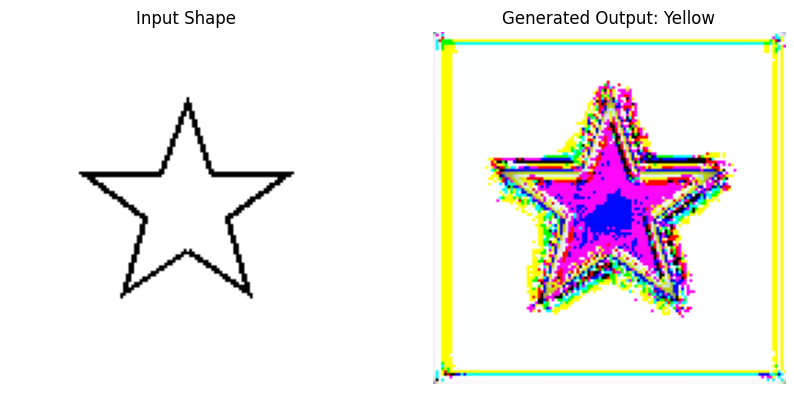

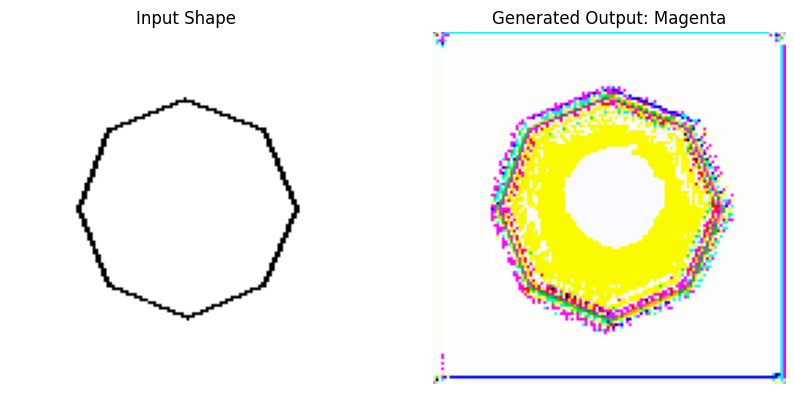

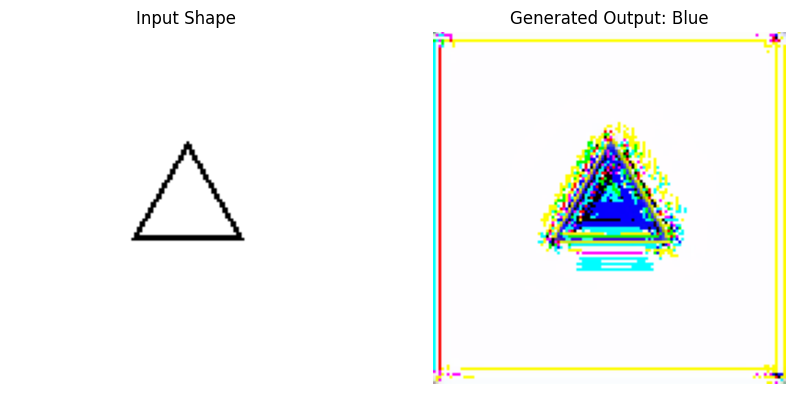

In [4]:
#Inference Function
def predict(image_path, color_name):
    """
    Takes an image path and color name, generates the colored polygon.
    """
    try:
        # 1. Load and transform the input image
        transform = transforms.Compose([
            transforms.Resize((IMG_SIZE, IMG_SIZE)),
            transforms.ToTensor()
        ])
        image = Image.open(image_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(DEVICE)

        # 2. Prepare color conditioning by one-hot encoding
        if color_name not in COLOR_MAP:
            print(f"Error: Color '{color_name}' is not a valid color.")
            return

        color_idx = torch.tensor([COLOR_MAP[color_name]], dtype=torch.long).to(DEVICE)
        color_cond = F.one_hot(color_idx, num_classes=NUM_COLORS).float().unsqueeze(1)

        # 3. Get prediction from the model
        with torch.no_grad():
            output = model(
                sample=input_tensor,
                timestep=1, # Can be any constant as it's not used in this non-diffusion task
                encoder_hidden_states=color_cond
            ).sample
        
        # 4. Convert output tensor to a displayable PIL Image
        output_image = transforms.ToPILImage()(output.squeeze(0).cpu())
        

        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(image)
        ax[0].set_title("Input Shape")
        ax[0].axis('off')
        
        ax[1].imshow(output_image)
        ax[1].set_title(f"Generated Output: {color_name.capitalize()}")
        ax[1].axis('off')
        
        plt.show()

    except FileNotFoundError:
        print(f"Error: Input image not found at '{image_path}'")
    except Exception as e:
        print(f"An error occurred during prediction: {e}")

print("\n--- Running Inference Examples ---")

DATASET_PATH = "/kaggle/input/ayna-dataset/dataset/validation/inputs"

# Check if the directory exists before trying to predict
if os.path.exists(DATASET_PATH):
    predict(os.path.join(DATASET_PATH, "star.png"), "yellow")
    predict(os.path.join(DATASET_PATH, "octagon.png"), "magenta")
    predict(os.path.join(DATASET_PATH, "triangle.png"), "blue")
else:
    print(f"Error: Dataset path not found at '{DATASET_PATH}'. Please update the path.")


Imports complete.
Loading configuration and model...
Model loaded successfully from /kaggle/input/ayna-inference-dataset-2-0 to cuda.

--- Running Inference Examples ---


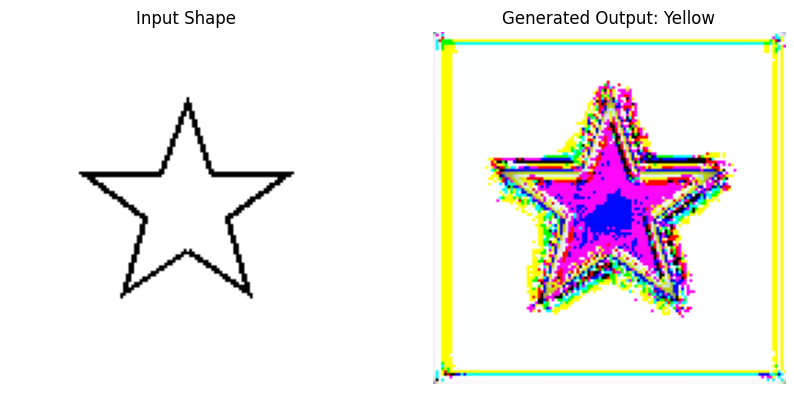

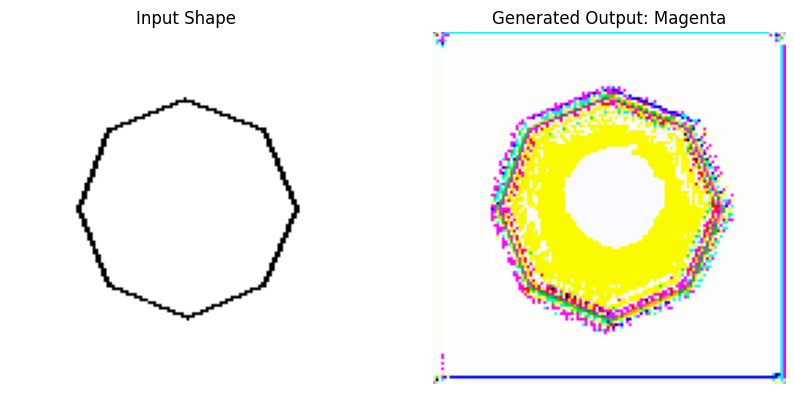

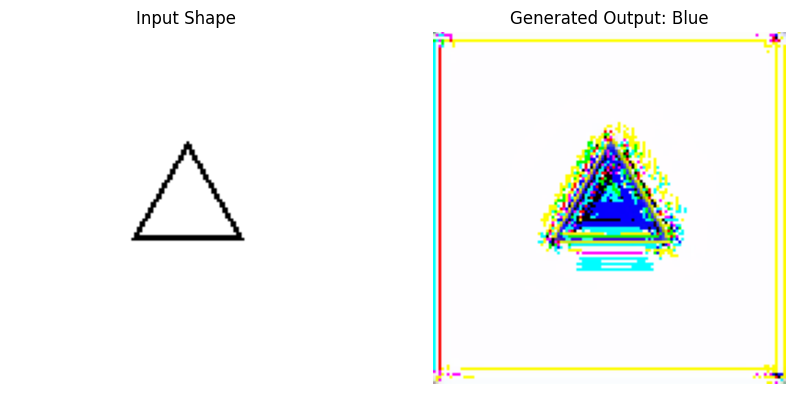

In [5]:
# Cell 1: Install necessary libraries
!pip install diffusers --upgrade -q

# Cell 2: Imports
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from diffusers import UNet2DConditionModel
import os

print("Imports complete.")


# Cell 3: Configuration and Model Loading
print("Loading configuration and model...")

# --- Configuration ---
IMG_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# IMPORTANT: Update this path to your model dataset directory
MODEL_DIR = "/kaggle/input/ayna-inference-dataset-2-0" 

# --- CORRECT, SYNCHRONIZED COLOR MAP ---
COLOR_MAP = {
    'blue': 0,
    'cyan': 1,
    'green': 2,
    'magenta': 3,
    'orange': 4,
    'purple': 5,
    'red': 6,
    'yellow': 7
}
NUM_COLORS = len(COLOR_MAP)


# --- Load Model ---
try:
    model = UNet2DConditionModel.from_pretrained(MODEL_DIR).to(DEVICE)
    model.eval()
    print(f"Model loaded successfully from {MODEL_DIR} to {DEVICE}.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the MODEL_DIR path is correct.")


# Cell 4: Inference Function
def predict(image_path, color_name):
    """
    Takes an image path and color name, generates the colored polygon.
    """
    try:
        transform = transforms.Compose([
            transforms.Resize((IMG_SIZE, IMG_SIZE)),
            transforms.ToTensor()
        ])
        image = Image.open(image_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(DEVICE)

        if color_name not in COLOR_MAP:
            print(f"Error: Color '{color_name}' is not a valid color.")
            return

        color_idx = torch.tensor([COLOR_MAP[color_name]], dtype=torch.long).to(DEVICE)
        color_cond = F.one_hot(color_idx, num_classes=NUM_COLORS).float().unsqueeze(1)

        with torch.no_grad():
            output = model(
                sample=input_tensor,
                timestep=1,
                encoder_hidden_states=color_cond
            ).sample
        
        output_image = transforms.ToPILImage()(output.squeeze(0).cpu())
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(image)
        ax[0].set_title("Input Shape")
        ax[0].axis('off')
        
        ax[1].imshow(output_image)
        ax[1].set_title(f"Generated Output: {color_name.capitalize()}")
        ax[1].axis('off')
        
        plt.show()

    except FileNotFoundError:
        print(f"Error: Input image not found at '{image_path}'")
    except Exception as e:
        print(f"An error occurred during prediction: {e}")

# Cell 5: Run Predictions
print("\n--- Running Inference Examples ---")

# IMPORTANT: Update this path to your original dataset's validation folder
DATASET_PATH = "/kaggle/input/ayna-dataset/dataset/validation/inputs"

if os.path.exists(DATASET_PATH):
    predict(os.path.join(DATASET_PATH, "star.png"), "yellow")
    predict(os.path.join(DATASET_PATH, "octagon.png"), "magenta")
    predict(os.path.join(DATASET_PATH, "triangle.png"), "blue")
else:
    print(f"Error: Dataset path not found at '{DATASET_PATH}'. Please update the path.")

In [ ]:
# --- FINAL VERIFICATION SCRIPT ---
import os
import torch
from diffusers import UNet2DConditionModel

print("--- Step 1: Verifying All Input Files ---")
print("I will now list every file available to this notebook.")
print("Please check if the model directory listed below matches the LATEST one you created.")
print("-" * 50)

# Recursively walk through the /kaggle/input/ directory and print all files
for root, dirs, files in os.walk('/kaggle/input/'):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(f"Directory found: {os.path.join(root, name)}")

print("-" * 50)
print("File listing complete.\n")


# --- Step 2: Verifying the COLOR_MAP ---
print("--- Step 2: Verifying the COLOR_MAP ---")
# This is the known correct, alphabetically sorted map
COLOR_MAP = {
    'blue': 0, 'cyan': 1, 'green': 2, 'magenta': 3,
    'orange': 4, 'purple': 5, 'red': 6, 'yellow': 7
}
print("The correct COLOR_MAP is:")
print(COLOR_MAP)
print("-" * 50)


# --- Step 3: Attempting to Load the Model ---
print("--- Step 3: Attempting to Load the Model ---")

# UPDATE THIS PATH to the verified model directory from the file list above
MODEL_DIR = "/kaggle/input/ayna-model-verified-final/best_model_diffusers" # <-- UPDATE IF NEEDED

print(f"Attempting to load model from: {MODEL_DIR}")

if os.path.exists(MODEL_DIR):
    try:
        # We will load the model just to confirm it's possible
        model = UNet2DConditionModel.from_pretrained(MODEL_DIR)
        print("\nSUCCESS: Model loaded without errors!")
        print("This confirms the files are valid and the path is correct.")
        
        # We will print a small part of the model's structure
        print("\nLoaded Model Architecture (partial):")
        print(model)
        
    except Exception as e:
        print(f"\nERROR: Failed to load the model. The error was: {e}")
        print("This could mean the saved files are corrupted or the path is incorrect.")
else:
    print(f"\nERROR: The directory '{MODEL_DIR}' does not exist.")
    print("This means the dataset is not attached correctly or the path is wrong.")

print("-" * 50)
print("Verification complete.")